In [1]:
import tensorflow as tf

## Loading - " MNIST Data Set"
## Containing Training samples = 60,000, Testing Samples = 10,000
## TensorFlow already contain MNIST data set which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist  # this is basically handwritten characters based on 28*28 sized images of 0 to 9

## After loading the MNIST data, Divide into train and Test Datasets

In [3]:
## unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

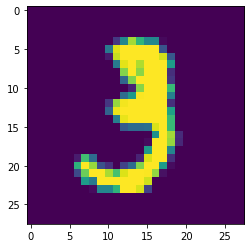

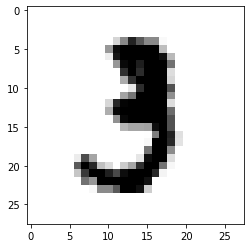

In [6]:
## just check the graph, how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[10])
plt.show()   ## in order to execute the graph
## however we dont know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[10], cmap = plt.cm.binary)

## Checking the values of each pixel 
## Before Normalisation

In [7]:
print(x_train[0])    ### before nomalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level (1 channel ==> 0 to 255), not Colored (RGB)
## Normalizing the data | Pre-Processing Step

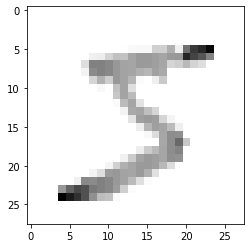

In [8]:
### you might have notices that, its gray image and all values varies from 0 to 255
### in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## After Normalization

In [9]:
print(x_train[0]) ## you can see all values are now normalised.
## All values are b/w 0-1 because x divided by 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])         ###just to check that we have labels inside our network

5


## Resizing image to make it suitable for apply Convolution Operation (CNN)

In [11]:
import numpy as np

In [13]:
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)       ### increasing one dimension for kernel-filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)          ### increasing one dimension for kernel operation

print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
## Training on 60,000 samples of MNIST handwritten dataset

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
#### Creating a neural network now
model = Sequential()

#### First Convolution layer    0 1 2 3    (60000,28,28,1)     28-3+1 = 26*26
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))     ### only for first convolution layer to mention inpur layer size
model.add(Activation("relu"))   ## activation function-> to make it non-linear, if any <0, remove, >0
model.add(MaxPooling2D(pool_size=(2,2)))  ## MaxPooling single maximum value of 2*2,

#### 2nd Convolution layer     26-3+1 = 24*24
model.add(Conv2D(64, (3,3)))    ## 2nd Convolution layer
model.add(Activation("relu"))   ## activation function
model.add(MaxPooling2D(pool_size=(2,2)))   ## MaxPooling


#### 3rd Convolution layer
model.add(Conv2D(64, (3,3)))    # 24*24
model.add(Activation("relu"))   
model.add(MaxPooling2D(pool_size=(2,2)))


#### Fully Convolution layer   # 1  20*20= 400
model.add(Flatten())    ## before using fully connected layer, need to be flatten so that 20 to 10
model.add(Dense(64))   #
model.add(Activation("relu"))

#### Fully Convolution layer # 2
model.add(Dense(32))   
model.add(Activation("relu"))

#### last fully Connected layer, output must be equal to number of classes, 10(0-9)
model.add(Dense(10))   ## this last dense layer must be equal to 10
model.add(Activation("softmax"))       ## activation function is changed to Softmax (Class Probabilites)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [18]:
print("Total Training Samples", len(x_trainr))

Total Training Samples 60000


In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
model.fit(x_trainr, y_train, epochs=5 , validation_split=0.3)    ## Training my model

Epoch 1/5
1313/1313 [==============================] - 80s 59ms/step - loss: 0.6736 - accuracy: 0.7835 - val_loss: 0.1288 - val_accuracy: 0.9594
Epoch 2/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.1113 - accuracy: 0.9664 - val_loss: 0.0766 - val_accuracy: 0.9770
Epoch 3/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0720 - accuracy: 0.9761 - val_loss: 0.0888 - val_accuracy: 0.9719
Epoch 4/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0759 - val_accuracy: 0.9772
Epoch 5/5
1313/1313 [==============================] - 74s 57ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0802 - val_accuracy: 0.9765


In [23]:
### Evaluating on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples ", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0768 - accuracy: 0.9779
Test loss on 10,000 test samples  0.07679622620344162
Validation Accuracy on 10,000 test samples 0.9779000282287598


In [24]:
# predictions = new_model.predict([x_test])  ## there is specialized method for efficiently saving you model, to name all input
    ## therefore instead of using new model loaded, for now only for predictions I am using simple model
predictions = model.predict([x_testr])

In [25]:
print(predictions)        ## actually these predictions are based on one hot encoding so these are only arrays, containing softmax probilities

[[1.2908538e-08 1.5143266e-06 4.6180347e-07 ... 9.9996352e-01
  4.8829230e-07 1.2091511e-05]
 [5.2259065e-04 2.9363823e-06 9.9909687e-01 ... 3.3783621e-05
  1.3784806e-05 7.2806650e-08]
 [3.7384572e-07 9.9999106e-01 6.9351984e-08 ... 5.5537434e-06
  2.3246716e-06 8.2831221e-08]
 ...
 [4.8087097e-11 7.1617563e-08 1.1842575e-09 ... 1.3056162e-07
  4.5650097e-08 3.7857358e-06]
 [6.5260167e-05 2.1622019e-07 6.4616701e-11 ... 7.8384221e-07
  1.2356303e-04 3.4768459e-07]
 [6.6582172e-05 8.8303103e-08 3.0918980e-06 ... 6.2792003e-07
  1.2471210e-06 1.6470580e-05]]


In [26]:
### in order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print (np.argmax(predictions[0]))  ### so actually argmax will return the maximum value index and find the value of it

7


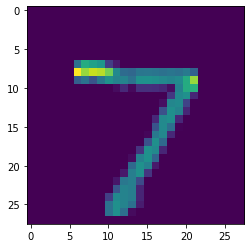

In [27]:
### now to check that is our answer is true or not
plt.imshow(x_test[0])

In [28]:
### in order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print (np.argmax(predictions[128]))  ### so actually argmax will return the maximum value index and find the value of it

8


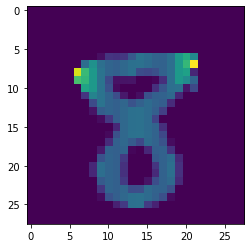

In [29]:
### now to check that is our answer is true or not
plt.imshow(x_test[128])

In [30]:
print("hello")

hello


In [68]:
import cv2   # pip install opencv-python

In [69]:
img = cv2.imread('eight.png')

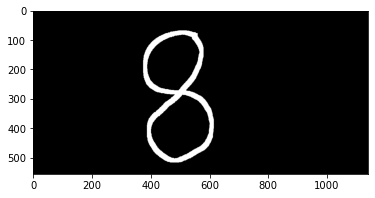

In [70]:
plt.imshow(img)

In [71]:
img.shape

(556, 1141, 3)

In [72]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [73]:
gray.shape

(556, 1141)

In [74]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [75]:
resized.shape

(28, 28)

In [76]:
newing  = tf.keras.utils.normalize(resized, axis=1)            ## 0 to 1 scaling

In [77]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)      # kernel operation of convoution layer,

In [78]:
newing.shape

(1, 28, 28, 1)

In [79]:
predictions = model.predict(newing)

In [80]:
statuss = np.argmax(predictions)

In [81]:
print(statuss)

8


## Video Demo

In [110]:
import cv2
## pip install opencv-contrib-python  full package

import numpy as np

# Font Configuration and scaling
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

cap = cv2.VideoCapture("sample.mp4")
# cap.set(cv2.CAP_PROP_FPS, 170)
# Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
    
text = "Some Text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font , fontScale=font_scale, thickness =1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] -25

#make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width +2, text_offset_y - text_height - 2))

# cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
# cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cntr =0;
while True:
    ret, frame = cap.imread()
    cntr = cntr +1;
    if((cntr%2)==0):
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
        newing  = tf.keras.utils.normalize(resized, axis = 1)
        newing  = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        predictions = model.predict(newing)
        status = np.argmax(predictions)
        print(status)
        print(type(status))
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        #Draw black backgroung rectangle
        cv2.rectangle(frame, (x1,x1), (x1+w1, y1+h1), (0, 0, 0), -1)
        # Add text
        cv2.putText(frame, status.astype(str), (x1+ int(w1/5), y1+int(h1/2), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255) , 2)
                    
        
        gray = cv2.cvtColor(ret, cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray, 1, 1,4)
        
        # Draw a rectangle around the faces
        for(x, y, w, h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        
        # Use putText() methos for
        # inserting text on video
                    
        cv2.imshow("handwritten Digits Recognition Model", frame)
        
        if cv2.waitkey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

SyntaxError: invalid syntax (<ipython-input-110-e6d7ed5e597a>, line 55)